# Imports 

Aim: Beamsplitters vs time plots

In [32]:
print('hi')

hi


In [35]:
%matplotlib inline
import os
import sys
import inspect
import numpy as np
from scipy.special import factorial
import h5py

#data_path = '/data'     ... data path specified later
#data_path
#initial_pulse = '../pulses/example_pulses/transmon_cat_initial_pulse.h5'
from h5py import File
import matplotlib.pyplot as plt
from pylab import*
from qutip import*

from scipy import interpolate
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)


In [36]:
sys.path.append(r'C:\_Lib\python\quantum-optimal-control')

In [37]:
from quantum_optimal_control.helper_functions.grape_functions import *
from quantum_optimal_control.main_grape.grape import Grape
from quantum_optimal_control import*

In [38]:
from IPython.display import clear_output

In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

In [40]:
import pandas as pd

# 3DMM2 parameters

In [41]:
# chi = Peak splitting MHz
chis = array([-33, -33]) 
kappas  = array([0,0]) # kHz

# Multimode circle grape

In [42]:
#TODO: Figure out why relative import doesn't work
sys.path.append(r'C:\_Lib\python\Multimode-Conditional-Displacements\hpc_runs\multimode_circle_grape\class_description')
from circle_grape_v4 import *

In [43]:
transmon_levels = 2

In [44]:
steps = int(1000/2) # not important for this notebook

mode = 2
mode_levels = 10
chi,kappa = chis[:mode],kappas[:mode]
chi = [i*1e-6 for i in chi]
kappa = [i*1e-6 for i in kappa]
circle_grape_params = {"chis":chi,"kappas":kappa,"alpha":30,"delta_c":0.01}

states_forbidden_list = []

convergence = {'rate': 0.1, 'update_step': 20, 'max_iterations': 250,
               'conv_target': 1e-3, 'learning_rate_decay': 500.0}




initial_guess = None


reg_coeffs = {'dwdt': 0.1, 'd2wdt2': 1.0e-3, 'forbid_dressed': False,
              'states_forbidden_list':states_forbidden_list,
              'forbidden_coeff_list': [1.0*steps] * len(states_forbidden_list)}

op = multimode_circle_grape_optimal_control(mode_state_num = mode_levels,
                                            number_of_modes = mode,hparams = circle_grape_params,add_disp_kerr=False)



In [45]:
#open dataset of resilts
filename = "beam_splitters"
df = pd.read_csv(filename)
df

,time,steps,alpha,detuning,qubit_drive_amp,err,filenum
0,1000,500,30,0.01,0.01,0.621863,0
1,1500,750,30,0.01,0.01,0.074013,1
2,2000,1000,30,0.01,0.01,0.169375,2
3,2500,1250,30,0.01,0.01,0.005698,3
4,1000,500,30,0.01,0.01,1.000000,4
5,1500,750,30,0.01,0.01,1.000000,5
6,2000,1000,30,0.01,0.01,1.000000,6
7,2500,1250,30,0.01,0.01,1.000000,7
8,1000,500,30,0.01,0.01,1.000000,8
9,1500,750,30,0.01,0.01,1.000000,9


In [47]:
data_filename = '00000_beamsplitter_data' + str(df['filenum'][3]) + '.h5' # highest fidelity (lowest error) for 1 photon beam splitter
start_state = [0, 1]
start_state

[0, 1]

In [48]:
t_list, out = op.qutip_mesolve_new(start_state,data_filename )

In [74]:
def reshape_rho(rho): 
    '''
    converts rho of dims [200, 200] to [[2, 10, 10], [2, 10, 10]]
    '''
    rho_np = np.array(rho)
    return Qobj(rho_np, dims = [[2, 10, 10], [2, 10, 10]])

In [78]:
out.states[-1].dims

[[200], [200]]

In [79]:
reshape_rho(out.states[-1]).dims

[[2, 10, 10], [2, 10, 10]]

In [65]:
# target = tensor(basis(2,0), basis(10, 1), basis(10, 0))
# #rho_t = Qobj(np.array(target*target.dag()))
# rho_t

In [66]:
#out.states[-1].overlap(rho_t)

In [67]:
# rho = np.array(out.states[-1])
# print(rho.shape)
# rho.shape = ((2, 10, 10), (2, 10, 10))
# Qobj(rho)

In [68]:
# psi = tensor(basis(2,0), basis(3, 0), basis(4, 0))
# psi

In [69]:
# a = np.array(psi)
# a.shape
# psi_ = Qobj(a, dims = [[2, 3, 4], [1, 1, 1]])

In [70]:
# psi_

# Wigner

In [81]:
def wigner_funcs(rho): 
    '''
    Input:  density matrix 
    Output wigner functions for the two modes coupled to transmon
    '''
    rho = reshape_rho(rho)
    w1 = wigner(rho.ptrace(1), xvec, xvec)
    w2 = wigner(rho.ptrace(2), xvec, xvec)
    return w1, w2
    

In [85]:
#wigner_funcs(out.states[-1])

In [87]:
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
# Save the animation as an animated GIF


In [91]:
len(out.states)

2501

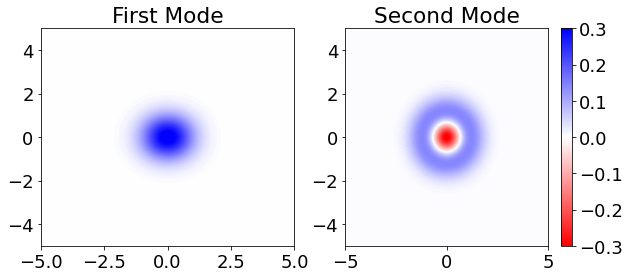

In [99]:
xvec = np.linspace(-5,5,200)
frames = 30
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
cmap = cm.bwr_r


##################### Initial 
W1, W2 = wigner_funcs(out.states[0]) 
plt1 = axes[0].contourf(xvec, xvec, W1, 100, cmap=cmap,  vmin = -0.3, vmax = 0.3)
plt2 = axes[1].contourf(xvec, xvec, W2, 100, cmap=cmap,  vmin = -0.3, vmax = 0.3) 


# Start of solution
from matplotlib.cm import ScalarMappable

levels = 400
vmin = -0.3
vmax = 0.3
ticks = [vmin + (0.1*i) for i in range(6+1)]

level_boundaries = np.linspace(vmin, vmax, levels + 1)

fig.colorbar(
    ScalarMappable(norm=plt2.norm, cmap=plt2.cmap),
    ticks=ticks,
    boundaries=level_boundaries,
    values=(level_boundaries[:-1] + level_boundaries[1:]) / 2,
)
##############################




axes[0].set_title("First Mode");


#plt.clim(-0.3, 0.3)

axes[1].set_title("Second Mode")




def animate(i):
    
    total_time = len(out.states)
    time_step = int(total_time/frames)
    curr_time = i*time_step
    #prit(curr_time)
    fig.suptitle('t = ' + str(curr_time/1000) + '$\mu$s /' + str(total_time/1000) + '$\mu$s /')
    W1, W2 = wigner_funcs(out.states[curr_time])
    
    axes[0].clear()
    axes[1].clear()
    
   
    plt1 = axes[1].contourf(xvec, xvec, W1, 100, cmap=cmap,  vmin = -0.3, vmax = 0.3) # swapping axes because want to show g10 -> g01 with first mode starting at 1 photon
    plt2 = axes[0].contourf(xvec, xvec, W2, 100, cmap=cmap,  vmin = -0.3, vmax = 0.3) 
    

ani = FuncAnimation(fig, animate, frames=frames, interval=500, repeat=False)
plt.show()

In [98]:
ani.save("circ_grape_beam_split.gif", dpi=300,
         writer=PillowWriter(fps=10))